<a href="https://colab.research.google.com/github/wanichayaporn/Multivariate/blob/main/Chapter3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

projection

1. Standardizing the Data (ปรับ mean และ std ให้ มี mean=0 std=1)
2. Calcuating the convariance matrix ( หา convariance matrix ของข้อมูลของเรา)
3. Computing the Eigenvectors and Eigenvalues (คำนวณ eigen values-vectors)
4. Picking Principle Components Using the Explained Variance (เลือกมาเฉพาะ eigen ที่จำเป็น)
5. Project Data Onto Lower-Dimensional Linear Subspace( map data ไปบนเเกนใหม่)

#PCA step by data

In [18]:
import pandas as pd

In [19]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


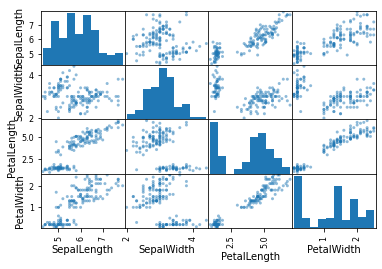

In [20]:
pd.plotting.scatter_matrix(example_df);

ข้อมูลที่มีเป็นตารางถ้าเราต้องการนำข้อมูลไปใช้ต้องแปลงเป็น matrix ก่อน โดยใช้ .iloc

In [21]:
import numpy as np

In [22]:
data_matrix = np.array(example_df.iloc[:,:-1])
data_matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
data_matrix = data_matrix.T
print(data_matrix.shape)
data_matrix

(4, 150)


array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

##1. Standardizing the Data (ปรับ mean และ std ให้มี mean = 0 std = 1)

In [25]:
meanD = np.mean(data_matrix,axis=1)
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [26]:
stdD = np.std(data_matrix,axis=1)
stdD

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [27]:
zmatrix = np.zeros((4,10))
zmatrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
zmatrix-meanD.reshape((4,1)) ##reshape บังคับขนาดของ matrix ให้เป็นไปตามที่เราต้องการ

array([[-5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333,
        -5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333],
       [-3.054     , -3.054     , -3.054     , -3.054     , -3.054     ,
        -3.054     , -3.054     , -3.054     , -3.054     , -3.054     ],
       [-3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667,
        -3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667],
       [-1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667,
        -1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667]])

In [29]:
onematirx = np.ones((4,10))
onematirx

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

##เลื่อน mean มาที่ 0

In [30]:
data_matrix_m0 = data_matrix - meanD.reshape((4,1))
data_matrix_m0

array([[-7.43333333e-01, -9.43333333e-01, -1.14333333e+00,
        -1.24333333e+00, -8.43333333e-01, -4.43333333e-01,
        -1.24333333e+00, -8.43333333e-01, -1.44333333e+00,
        -9.43333333e-01, -4.43333333e-01, -1.04333333e+00,
        -1.04333333e+00, -1.54333333e+00, -4.33333333e-02,
        -1.43333333e-01, -4.43333333e-01, -7.43333333e-01,
        -1.43333333e-01, -7.43333333e-01, -4.43333333e-01,
        -7.43333333e-01, -1.24333333e+00, -7.43333333e-01,
        -1.04333333e+00, -8.43333333e-01, -8.43333333e-01,
        -6.43333333e-01, -6.43333333e-01, -1.14333333e+00,
        -1.04333333e+00, -4.43333333e-01, -6.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -8.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -1.44333333e+00,
        -7.43333333e-01, -8.43333333e-01, -1.34333333e+00,
        -1.44333333e+00, -8.43333333e-01, -7.43333333e-01,
        -1.04333333e+00, -7.43333333e-01, -1.24333333e+00,
        -5.43333333e-01, -8.43333333e-01,  1.15666667e+0

In [32]:
from matplotlib import pyplot as plt

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([4.3       , 4.62727273, 4.95454545, 5.28181818, 5.60909091,
        5.93636364, 6.26363636, 6.59090909, 6.91818182, 7.24545455,
        7.57272727, 7.9       ]),
 <a list of 11 Patch objects>)

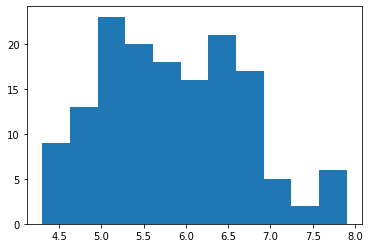

In [33]:
plt.hist(data_matrix[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

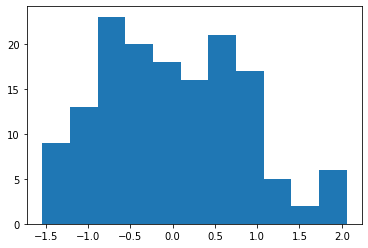

In [34]:
plt.hist(data_matrix_m0[0,:],bins = 'rice')

In [35]:
data_matrix_m0_std1 = data_matrix_m0/stdD.reshape((4,1))

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.87002413, -1.47347474, -1.07692535, -0.68037595, -0.28382656,
         0.11272284,  0.50927223,  0.90582163,  1.30237102,  1.69892041,
         2.09546981,  2.4920192 ]),
 <a list of 11 Patch objects>)

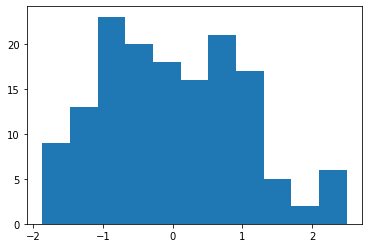

In [36]:
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice')

In [37]:
np.mean(data_matrix_m0_std1,axis=1)

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [38]:
np.std(data_matrix_m0_std1,axis=1)

array([1., 1., 1., 1.])

วิธีลัดของการทำ mean=0 และ std=1

In [39]:
from scipy import stats

In [40]:
stats.zscore(data_matrix,axis=1)

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

1. Calculating the coveriane matrix

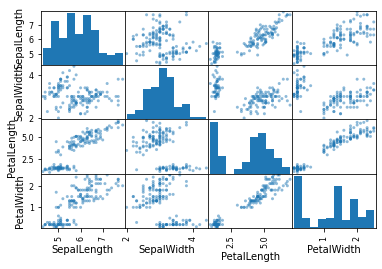

In [41]:
pd.plotting.scatter_matrix(example_df);
#เรียกมาดูซ้ำ

In [42]:
data_cov = np.cov(data_matrix_m0_std1)
data_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])